### Wound alignment dev file
[ ] import and plot the X and Y values into the tiff files <br>
[ ] find neighbours from the X and Y values <br>
[ ] Find the aligment between neighbours <br>

In [1]:
#Import required packages
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import re
from glob import glob
import pandas as pd
import seaborn as sns
from scipy import stats 
from PIL import Image
import matplotlib.cm as cm
import matplotlib.colors as mcolors
#from cellpose import plot, utils, io

In [2]:
class WoundAlignemnt:
    def __init__(self, path, output_path):
        self.path = path
        self.output_path = output_path
        self.images= glob(self.path + '/*.tif')
        self.csv_files = glob(self.path + '/R*.csv')
        

In [3]:
controlkeyfile="H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/27022023_TgLifeactGFPWoundhealing/FeretAnalysis/FeretControl27022023_Key.csv"
controlkey = pd.read_csv(controlkeyfile)
keratinMOkeyfile="H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/AlignmentResults_K4K8MO_07032023/FeretK4K8MO_07032023_Key.csv"
keratinMOkey = pd.read_csv(keratinMOkeyfile)
mutantkeyfile="H:/PHD_data/Imaging_et_analysis/NikSD/2025/06_Jun/03062025_AblationsMutants/AlignmentResults_Mutants_03062025/FeretMutant_03062025_Key.csv"
mutantkey = pd.read_csv(mutantkeyfile)

In [4]:
alignementdf=pd.DataFrame(columns=["Folder","Alignment"])
for ii,row in controlkey.iterrows():
    csvfiles=glob(row["Folder"]+"*.csv")
    datafile=pd.read_csv(csvfiles[0])
    imagefiles=glob(row["Folder"]+"*.tif")[0]
    image=Image.open(imagefiles)
    
    dfnew=moveorigin(datafile,row["Scalexy"],row["CenterX"],row["CenterY"])
    plotCenters(dfnew,image,row["Scalexy"],row["CenterX"],row["CenterY"],"Alignment")
    plotlines(dfnew,image,row["Scalexy"],row["CenterX"],row["CenterY"],"Alignment")
    # Bin the data with respect to 'R' into 3 bins
    dfnew['R_bin'] = pd.cut(dfnew['R'], bins=3, labels=['Bin1', 'Bin2', 'Bin3'])
    
    # Calculate the average alignment within these bins
    average_alignment_bins = dfnew.groupby('R_bin',observed=True)['Alignment'].mean()
    
    print(f'Average alignment for {row["Folder"]} in bins is:\n{average_alignment_bins}')    
    
    alignementdf.loc[ii] = [row["Folder"],average_alignment_bins]
    print(f'Average alignment for {row["Folder"]} is {average_alignment_bins.mean()}')

NameError: name 'moveorigin' is not defined

In [5]:
alignementdf

,Folder,Alignment


In [6]:
MOalignmentdf=pd.DataFrame(columns=["Folder","Alignment"])
for ii,row in keratinMOkey.iterrows():

    csvfiles=glob(row["Folder"]+"*.csv")
    datafile=pd.read_csv(csvfiles[0])
    imagefiles=glob(row["Folder"]+"*.tif")[0]
    image=Image.open(imagefiles)
    
    dfnew=moveorigin(datafile,row["Scalexy"],row["CenterX"],row["CenterY"])
    plotCenters(dfnew,image,row["Scalexy"],row["CenterX"],row["CenterY"],"Alignment")
    plt.savefig(f"{os.path.basename(keratinMOkeyfile)}Exp{ii}_Centers.png",dpi=300)
    plotlines(dfnew,image,row["Scalexy"],row["CenterX"],row["CenterY"],"Alignment")
    plt.savefig(f"{os.path.basename(keratinMOkeyfile)}Exp{ii}_Lines.png",dpi=300)
    # Bin the data with respect to 'R' into 3 bins
    dfnew['R_bin'] = pd.cut(dfnew['R'], bins=3, labels=['Bin1', 'Bin2', 'Bin3'])
    
    # Calculate the average alignment within these bins
    MOaverage_alignment_bins = dfnew.groupby('R_bin',observed=True)['Alignment'].mean()
    
    print(f'Average alignment for {row["Folder"]} in bins is:\n{MOaverage_alignment_bins}')    
    
    MOalignmentdf.loc[ii] = [row["Folder"],MOaverage_alignment_bins]
    print(f'Average alignment for {row["Folder"]} is {MOaverage_alignment_bins.mean()}')


NameError: name 'moveorigin' is not defined

In [38]:
csvfiles[0]



'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0008/CP\\ResultsCenter.csv'

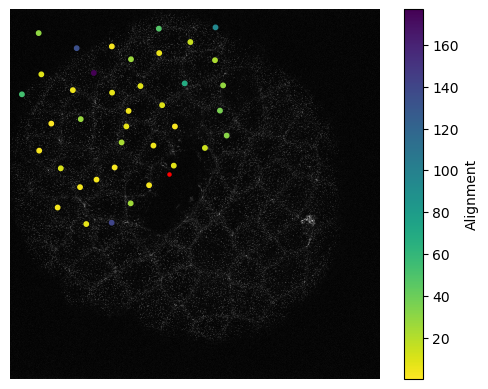

<Figure size 640x480 with 0 Axes>

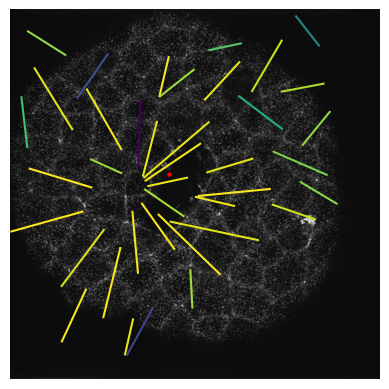

Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0002\ImageSeq in bins is:
R_bin
Bin1    47.193716
Bin2    38.007706
Bin3    33.245899
Name: Alignment, dtype: float64
Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0002\ImageSeq is 39.482440092666614


<Figure size 640x480 with 0 Axes>

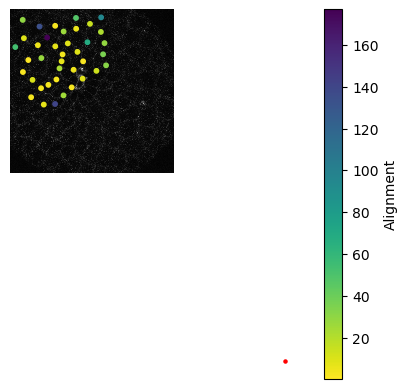

<Figure size 640x480 with 0 Axes>

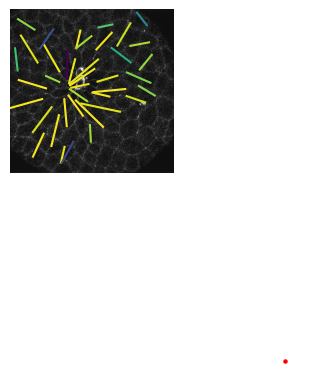

Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0003\Imageseq in bins is:
R_bin
Bin1    69.781603
Bin2    56.701254
Bin3    79.954518
Name: Alignment, dtype: float64
Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0003\Imageseq is 68.81245850411452


<Figure size 640x480 with 0 Axes>

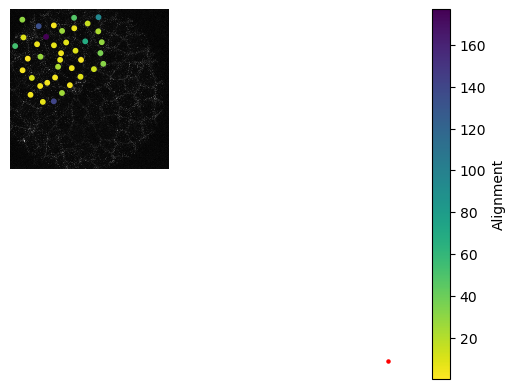

<Figure size 640x480 with 0 Axes>

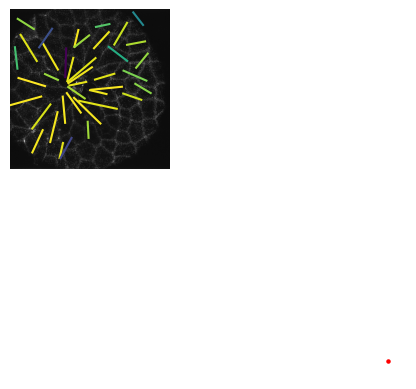

Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0008\Imageseq in bins is:
R_bin
Bin1    43.379167
Bin2    50.965947
Bin3    21.922854
Name: Alignment, dtype: float64
Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0008\Imageseq is 38.755989418301375


<Figure size 640x480 with 0 Axes>

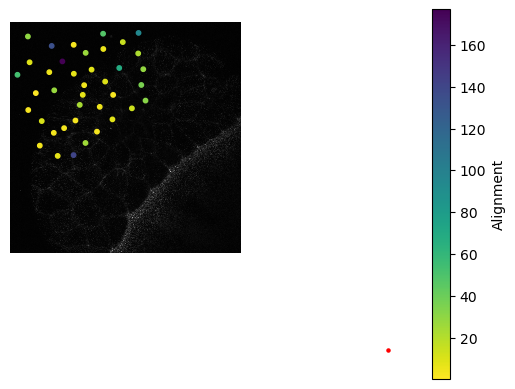

<Figure size 640x480 with 0 Axes>

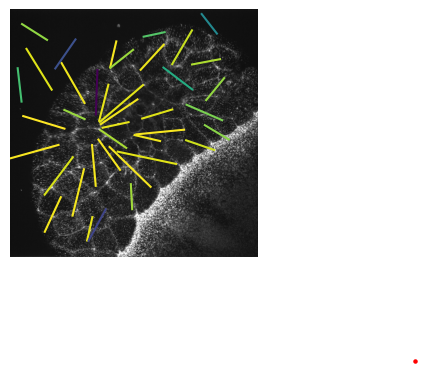

Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0014\Imageseq in bins is:
R_bin
Bin1    48.331567
Bin2    49.965042
Bin3    39.174565
Name: Alignment, dtype: float64
Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0014\Imageseq is 45.82372485460301


<Figure size 640x480 with 0 Axes>

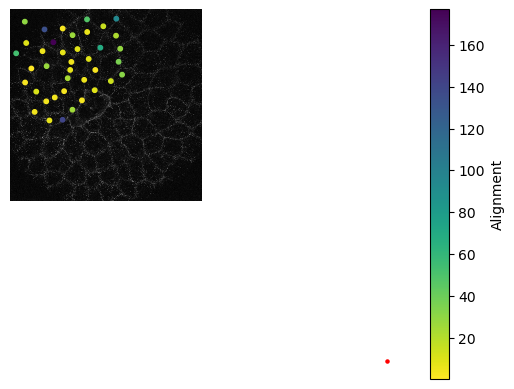

<Figure size 640x480 with 0 Axes>

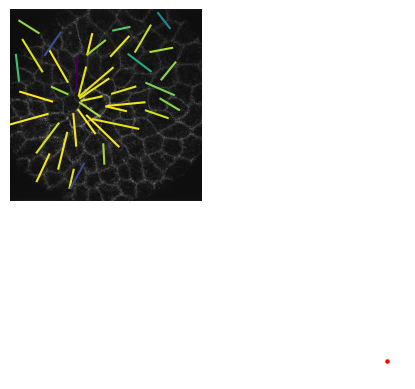

Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0017\Imageseq in bins is:
R_bin
Bin1    76.015211
Bin2    43.677869
Bin3    23.401133
Name: Alignment, dtype: float64
Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0017\Imageseq is 47.69807086293823


<Figure size 640x480 with 0 Axes>

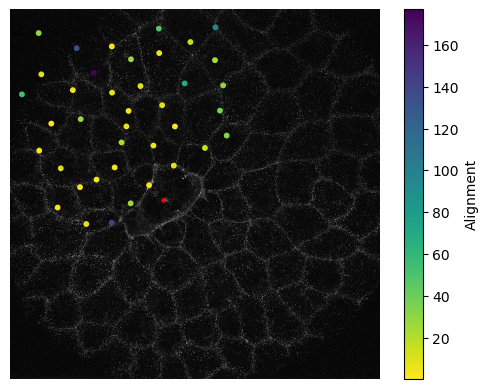

<Figure size 640x480 with 0 Axes>

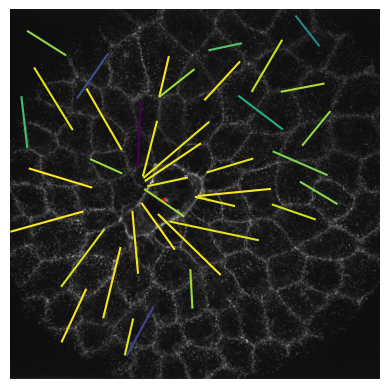

Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0021\Imageseq in bins is:
R_bin
Bin1    28.712961
Bin2    10.701826
Bin3    51.867814
Name: Alignment, dtype: float64
Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0021\Imageseq is 30.427533799003584


<Figure size 640x480 with 0 Axes>

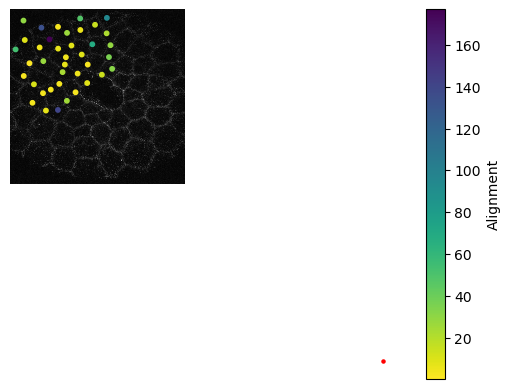

<Figure size 640x480 with 0 Axes>

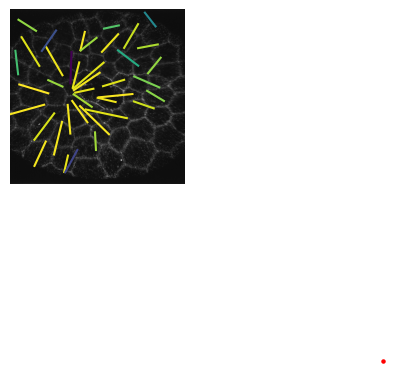

Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0023\Imageseq in bins is:
R_bin
Bin1    54.042826
Bin2    48.674974
Bin3    60.076712
Name: Alignment, dtype: float64
Average alignment for H:\PHD_data\Imaging_et_analysis\NikSD\2025\06_Jun\03062025_AblationsMutants\Pos0023\Imageseq is 54.26483713807323


<Figure size 640x480 with 0 Axes>

In [13]:
Mutantdf=pd.DataFrame(columns=["Folder","Alignment"])
for ii,row in mutantkey.iterrows():
    csvfiles=glob(row["Folder"]+"/*.csv")
    datafile=pd.read_csv(csvfiles[0])
    imagefiles=glob(row["Folder"]+"/*.tif")[0]
    image=Image.open(imagefiles)
    dfmut=moveorigin(datafile,row["Scalexy"],row["CenterX"],row["CenterY"])
    plotCenters(dfnew,image,row["Scalexy"],row["CenterX"],row["CenterY"],"Alignment")
    plt.savefig(f"{os.path.basename(mutantkeyfile)}Exp{ii}_Centers.png",dpi=300)
    plotlines(dfnew,image,row["Scalexy"],row["CenterX"],row["CenterY"],"Alignment")
    plt.savefig(f"{os.path.basename(mutantkeyfile)}Exp{ii}_Lines.png",dpi=300)
    # Bin the data with respect to 'R' into 3 bins
    dfmut['R_bin'] = pd.cut(dfnew['R'], bins=3, labels=['Bin1', 'Bin2', 'Bin3'])
    # Calculate the average alignment within these bins
    mutantaverage_alignment_bins = dfmut.groupby('R_bin',observed=True)['Alignment'].mean()
    print(f'Average alignment for {row["Folder"]} in bins is:\n{mutantaverage_alignment_bins}')    
    
    Mutantdf.loc[ii] = [row["Folder"],mutantaverage_alignment_bins]
    print(f'Average alignment for {row["Folder"]} is {mutantaverage_alignment_bins.mean()}')

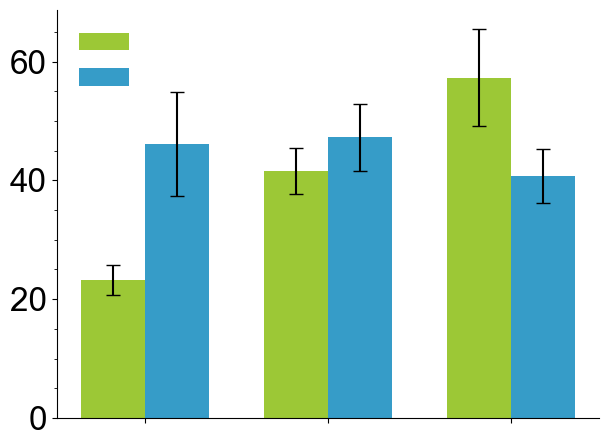

In [14]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(7, 5.3), sharey=True)

# Set the plot configurations
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
# Define the positions for the bars
bar_width = 0.35
index = np.arange(3)  # Assuming 3 bins
#plt.ylim(0,80)
ax.set_yticks(np.arange(0,86,5),minor=True)
#parsing the old data from previous plottings
data=pd.read_csv("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure4/FeretAlignment/Fig4alignment_data.csv")
controlbin1=data["Control Bin 1"]
controlbin2=data["Control Bin 2"]
controlbin3=data["Control Bin 3"]
MObin1=data["MO Bin 1"]
MObin2=data["MO Bin 2"]
MObin3=data["MO Bin 3"]

plt.bar(index, [controlbin1.mean(), controlbin2.mean(), controlbin3.mean()], bar_width, label=' ', color="#83bb03", yerr=[controlbin1.sem(), controlbin2.sem(), controlbin3.sem()], capsize=5, alpha=0.8)
plt.bar(index + bar_width, [MObin1.mean(), MObin2.mean(), MObin3.mean()], bar_width, label='   ', color="#0383bb", yerr=[MObin1.sem(), MObin2.sem(), MObin3.sem()], capsize=5, alpha=0.8)
plt.xticks(index + bar_width / 2, ["", "", ""])
plt.legend(loc="upper left",frameon=False,fontsize=18)
plt.savefig("H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure4\FeretAlignment\Fig4alignment.png",bbox_inches='tight',transparent=True)
plt.savefig("H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure4\FeretAlignment\Fig4alignment.svg",bbox_inches='tight',transparent=True)
plt.savefig("H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure4\FeretAlignment\Fig4alignment.pdf",bbox_inches='tight',transparent=True)
plt.show()

c:\miniforge3\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\miniforge3\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\miniforge3\envs\snBase\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\miniforge3\envs\snBase\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\miniforge3\envs\snBase\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


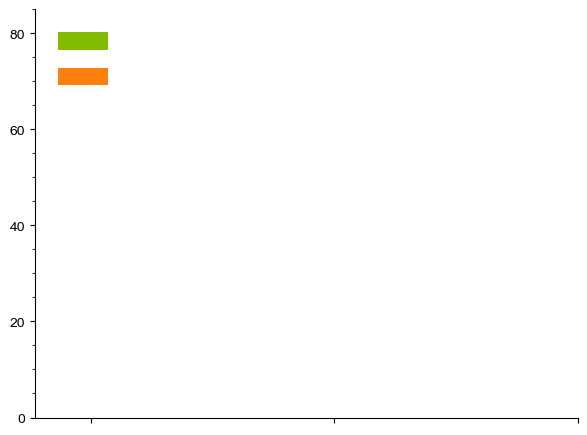

In [8]:
# alignment plot
controlbin1=[]
controlbin2=[]
controlbin3=[]
MObin1=[]
MObin2=[]
MObin3=[]
for aligni, rowi in alignementdf.iterrows():
    controlbin1.append(rowi["Alignment"]["Bin1"])
    controlbin2.append(rowi["Alignment"]["Bin2"])
    controlbin3.append(rowi["Alignment"]["Bin3"])
for aligni, rowi in MOalignmentdf.iterrows():
    MObin1.append(rowi["Alignment"]["Bin1"])
    MObin2.append(rowi["Alignment"]["Bin2"])
    MObin3.append(rowi["Alignment"]["Bin3"])
# Create the figure and axes
fig, ax = plt.subplots(figsize=(7, 5.3), sharey=True)

# Set the plot configurations
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
# Define the positions for the bars
bar_width = 0.35
index = np.arange(3)  # Assuming 3 bins
#plt.ylim(0,80)
ax.set_yticks(np.arange(0,86,5),minor=True)
# Plot the bars for Control MO
plt.bar(index, [np.mean(controlbin1), np.mean(controlbin2), np.mean(controlbin3)], 
        yerr=[np.std(controlbin1), np.std(controlbin2), np.std(controlbin3)], 
        width=bar_width, color="#83bb03", label=' ',capsize=5)#, alpha=0.5

# Plot the bars for Keratin MO, shifted by bar_width
plt.bar(index + bar_width, [np.mean(MObin1), np.mean(MObin2), np.mean(MObin3)], 
        yerr=[np.std(MObin1), np.std(MObin2), np.std(MObin3)], 
        width=bar_width, color="#ff7f0e", label='  ',capsize=5)#, alpha=0.5
plt.xticks(index + bar_width / 2, ["", "", ""])
plt.legend(loc="upper left",frameon=False,fontsize=18)
plt.savefig("H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure4\FeretAlignment\Fig4alignment.png",bbox_inches='tight',transparent=True)
plt.savefig("H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure4\FeretAlignment\Fig4alignment.svg",bbox_inches='tight',transparent=True)
plt.savefig("H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure4\FeretAlignment\Fig4alignment.pdf",bbox_inches='tight',transparent=True)
# Save the data as a CSV file
data = {
    'Control Bin 1': controlbin1,
    'Control Bin 2': controlbin2,
    'Control Bin 3': controlbin3,
    'MO Bin 1': MObin1,
    'MO Bin 2': MObin2,
    'MO Bin 3': MObin3
}

#df = pd.DataFrame(data)
#df.to_csv('H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure4\FeretAlignment\Fig4alignment_data.csv', index=False)
plt.show()

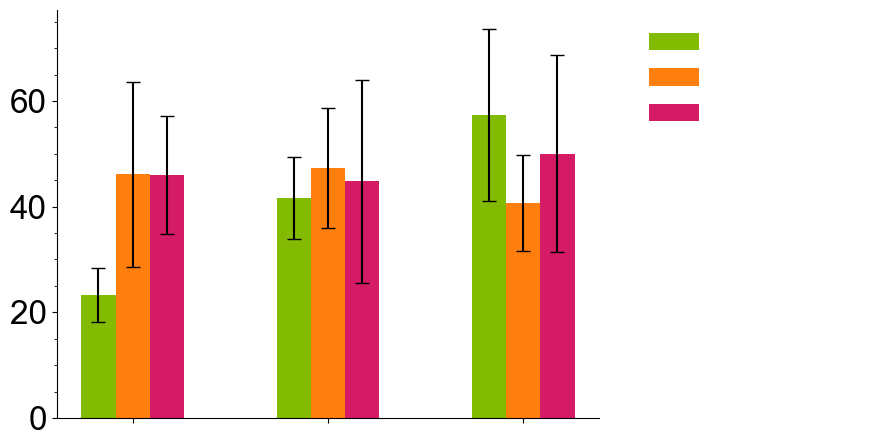

In [59]:
# alignment plot
controlbin1=[]
controlbin2=[]
controlbin3=[]
MObin1=[]
MObin2=[]
MObin3=[]
mutantbin1=[]
mutantbin2=[]
mutantbin3=[]
for aligni, rowi in alignementdf.iterrows():
    controlbin1.append(rowi["Alignment"]["Bin1"])
    controlbin2.append(rowi["Alignment"]["Bin2"])
    controlbin3.append(rowi["Alignment"]["Bin3"])
for aligni, rowi in MOalignmentdf.iterrows():
    MObin1.append(rowi["Alignment"]["Bin1"])
    MObin2.append(rowi["Alignment"]["Bin2"])
    MObin3.append(rowi["Alignment"]["Bin3"])
for aligni, rowi in Mutantdf.iterrows():
    mutantbin1.append(rowi["Alignment"]["Bin1"])
    mutantbin2.append(rowi["Alignment"]["Bin2"])
    mutantbin3.append(rowi["Alignment"]["Bin3"])
# Create the figure and axes
fig, ax = plt.subplots(figsize=(7, 5.3), sharey=True)

# Set the plot configurations
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
# Define the positions for the bars
bar_width = 0.35
index = np.arange(3)  # Assuming 3 bins
#plt.ylim(0,80)
ax.set_yticks(np.arange(0,146,5),minor=True)
plt.xticks(index*2+bar_width  , ["", "", ""])
# Plot the bars for Control MO
plt.bar(index*2, [np.mean(controlbin1), np.mean(controlbin2), np.mean(controlbin3)], 
        yerr=[np.std(controlbin1), np.std(controlbin2), np.std(controlbin3)], 
        width=bar_width, color="#83bb03", label='                     ',capsize=5)#, alpha=0.5

# Plot the bars for Keratin MO, shifted by bar_width
plt.bar(index*2 + bar_width, [np.mean(MObin1), np.mean(MObin2), np.mean(MObin3)], 
        yerr=[np.std(MObin1), np.std(MObin2), np.std(MObin3)], 
        width=bar_width, color="#ff7f0e", label='                    ',capsize=5)#, alpha=0.5
# Plot the bars for Mutant, shifted by 2*bar_width
plt.bar(index*2 + 2 * bar_width, [np.mean(mutantbin1), np.mean(mutantbin2), np.mean(mutantbin3)], 
        yerr=[np.std(mutantbin1), np.std(mutantbin2), np.std(mutantbin3)], 
        width=bar_width, color="#D51B66", label='                 ',capsize=5)#, alpha=0.5

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,fontsize=18)
plt.savefig("H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure4\FeretAlignment\Fig4Mutantalignment.png",bbox_inches='tight',transparent=True)
plt.savefig("H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure4\FeretAlignment\Fig4Mutantalignment.svg",bbox_inches='tight',transparent=True)
plt.savefig("H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure4\FeretAlignment\Fig4Mutantalignment.pdf",bbox_inches='tight',transparent=True)
# Save the data as a CSV file
data = {
    'Control Bin 1': controlbin1,
    'Control Bin 2': controlbin2,
    'Control Bin 3': controlbin3,
    'MO Bin 1': MObin1,
    'MO Bin 2': MObin2,
    'MO Bin 3': MObin3
}

#df = pd.DataFrame(data)
#df.to_csv('H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure4\FeretAlignment\Fig4alignment_data.csv', index=False)
plt.show()

In [9]:
#test 
testfolder="H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing/TimeSrs001/CP/FeretAnalysis/"
testfile=glob(testfolder+"/R*.csv")
anglefile=glob(testfolder+"/An*.csv")
testdf=pd.read_csv(testfile[0])
angle_df=pd.read_csv(anglefile[0])
testimage="H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing/TimeSrs001/CP/MAX_Pos001_1202204_TgUtrmcherry_K4K8MO0025.tif"
image=Image.open(testimage)
scalexy=0.108 #micron per pixel
def plotCenters(df,image,scalexy,centerX,centerY,color:str="FeretAngle"):
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray',interpolation='nearest')
    plot=ax.scatter(df['X']/scalexy,df['Y']/scalexy,s=10,c=df[color],cmap='viridis_r')
    if centerY and centerX:
        ax.scatter(centerX/scalexy,centerY/scalexy,s=5,color="red")
        # Add colorbar
    cbar = plt.colorbar(plot, ax=ax)
    cbar.set_label(color)
    ax.axis('off')    
    plt.show()

def plotlines(df,image,scalexy,centerX,centerY,color:str="Alignemnt"):
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray',vmin=100,vmax=300)
    norm=mpl.colors.Normalize(vmin=df[color].min(), vmax=df[color].max())
    colormap = cm.viridis_r
    for i, row in df.iterrows():
        if row["FeretAngle"]>90:
            row["FeretAngle"]=row["FeretAngle"]-180
        xmove=row["Feret"]/scalexy*np.cos(row["FeretAngle"]*3.14/180)
        ymove=row["Feret"]/scalexy*np.sin(row["FeretAngle"]*3.14/180)
        ax.plot([(row['FeretX']),(row["FeretX"]+xmove)],[(row['FeretY']),(row["FeretY"]-ymove)],color=colormap(norm(row[color])))
    if centerX and centerY:
        ax.scatter(centerX/scalexy,centerY/scalexy,s=5,color="red")

    ax.axis('off')
    plt.show()

from scipy.spatial import voronoi_plot_2d,Voronoi
def wound_center(df):
    vor =Voronoi(np.array[df["X"],df["Y"]])
    return vor.points[vor.point_region[0]]
def moveorigin(df,scalexy,centerx,centery):
    df["X'"]=df["X"]-centerx
    df["Y'"]=centery-df["Y"]
    df["R"]=np.sqrt(df["X'"]**2+df["Y'"]**2)
    df["PolarAngle"]=np.arctan2(df["Y'"]*scalexy,df["X'"]*scalexy)*180/np.pi
    for i,row in df.iterrows():
        #CORRECTING THE Feret Angle
        if row["FeretAngle"]>90:
            df.loc[i,"FeretAngle"]=row["FeretAngle"]-180
        else:
           df.loc[i,"FeretAngle"]=row["FeretAngle"]

        #CORRECTING THE ANGLE CORDINATES
        if row["X'"]<0 and row["Y'"]<0:
            df.loc[i,"PolarAngle"]=180+row["PolarAngle"]
        if row["X'"]<0 and row["Y'"]>0:
            df.loc[i,"PolarAngle"]=row["PolarAngle"]-180
        if row["X'"]>0 and row["Y'"]<0:
            df.loc[i,"PolarAngle"]=row["PolarAngle"]
    df["Alignment"]=np.abs(df["PolarAngle"]-df["FeretAngle"])

    return df

def find_centroid(df,x1=250,x2=1000,y1=650,y2=1500):
    filtered_df = df[(df['X'] >= x1*scalexy) & (df['X'] <= x2*scalexy)& (df['Y'] >= y1*scalexy) & (df['Y'] <= y2*scalexy)]
    centroid_x = filtered_df["X"].mean()
    centroid_y = filtered_df["Y"].mean()
    return centroid_x, centroid_y




In [8]:
print(f'centroid point is {find_centroid(testdf)}')

centroid point is (75.71218181818182, 113.71354545454545)


In [129]:
for i,row in testdf.iterrows():
    if row["FeretAngle"]>90:
        testdf.loc[i,"FeretAngle'"]=row["FeretAngle"]-180
    else:
        testdf.loc[i,"FeretAngle'"]=row["FeretAngle"]
testdf["X'"]=testdf["X"]-find_centroid(testdf)[0]
testdf["Y'"]=find_centroid(testdf)[1]-testdf["Y"]
testdf["PolarAngle"]=np.arctan2(testdf["Y'"],testdf["X'"])*180/np.pi
for i,row in testdf.iterrows():
    if row["X'"]<0 and row["Y'"]<0:
        testdf.loc[i,"PolarAngle"]=180+row["PolarAngle"]
    if row["X'"]<0 and row["Y'"]>0:
        testdf.loc[i,"PolarAngle"]=row["PolarAngle"]-180
    if row["X'"]>0 and row["Y'"]<0:
        testdf.loc[i,"PolarAngle"]=row["PolarAngle"]
testdf[["X","X'","Y","Y'","PolarAngle","FeretAngle'"]]

,X,X',Y,Y',PolarAngle,FeretAngle'
0,182.623,106.910818,45.189,68.524545,32.657862,10.700
1,55.941,-19.771182,71.864,41.849545,-64.712319,-60.130
2,116.179,40.466818,68.256,45.457545,48.324164,40.512
3,189.863,114.150818,67.655,46.058545,21.973510,50.803
4,10.545,-65.167182,75.612,38.101545,-30.313709,-83.460
5,103.635,27.922818,104.210,9.503545,18.796033,12.070
6,193.036,117.323818,112.360,1.353545,0.660983,-30.906
7,107.479,31.766818,172.772,-59.058455,-61.724737,-87.017
8,25.931,-49.781182,125.815,-12.101455,13.663177,15.570
9,62.964,-12.748182,97.715,15.998545,-51.450978,-24.305


In [139]:
alignementdf=pd.DataFrame(testdf["PolarAngle"]-testdf["FeretAngle'"],columns=["Aligment"])
alignementdf["PureAlign"]=np.abs(alignementdf["Aligment"])
alignementdf["R"]=np.sqrt(testdf["X'"]**2+testdf["Y'"]**2)
alignementdf

,Aligment,PureAlign,R
0,21.957862,21.957862,126.986363
1,-4.582319,4.582319,46.284815
2,7.812164,7.812164,60.860100
3,-28.829490,28.829490,123.092644
4,53.146291,53.146291,75.488339
5,6.726033,6.726033,29.495782
6,31.566983,31.566983,117.331626
7,25.292263,25.292263,67.059912
8,-1.906823,1.906823,51.230960
9,-27.145978,27.145978,20.456529


In [ ]:
def radial_Alignment(Df,nbins=3):
    Df["R"]=np.sqrt(Df["X'"]**2+Df["Y'"]**2)
    Df["alignmentindex"]=Df[[]]

In [44]:
filtered_df = pd.DataFrame(testdf[(testdf['X'] >= 250*scalexy) & (testdf['X'] <= 1000*scalexy)& (testdf['Y'] >= 750*scalexy) & (testdf['Y'] <= 1500*scalexy)])
filtered_df.reset_index(inplace=False)
filtered_df["Theta"]=np.rad2deg(np.arctan2(filtered_df["Y"],filtered_df["X"]))
filtered_df["R"]=np.sqrt(filtered_df["X"]**2+filtered_df["Y"]**2)
filtered_df["Aligtheta"]=filtered_df["Theta"]-filtered_df["FeretAngle"]
filtered_df

,,Area,X,Y,XM,YM,Feret,FeretX,FeretY,FeretAngle,MinFeret,Theta,R,Aligtheta
5,6,333.077,103.635,104.210,103.529,104.221,35.221,766,978,12.070,15.922,45.158507,146.969171,33.088507
9,10,373.819,62.964,97.715,62.966,97.733,29.473,449,831,155.695,17.166,57.203737,116.244082,-98.491263
10,11,1082.720,36.713,101.702,36.861,101.749,57.287,109,882,163.072,27.408,70.151126,108.125581,-92.920874
11,12,1022.670,45.175,141.565,45.417,141.339,62.430,286,1532,53.110,23.233,72.301526,148.598216,19.191526
12,13,990.433,77.029,151.625,76.994,151.322,54.374,678,1122,95.143,24.774,63.068379,170.069420,-32.074621
15,16,755.016,93.189,140.787,93.133,140.693,49.469,731,1076,125.465,21.237,56.498835,168.834739,-68.966165
17,18,567.028,99.361,118.506,99.150,118.432,41.580,748,998,145.399,19.239,50.021950,154.648894,-95.377050
22,23,482.905,105.604,90.413,105.424,90.528,58.668,751,948,34.013,19.371,40.568528,139.020557,6.555528
38,39,493.087,62.334,158.343,62.346,158.174,63.440,517,1705,76.272,21.176,68.512207,170.170600,-7.759793


In [12]:
[testdf[(testdf['X'] >= 250*scalexy) & (testdf['X'] <= 1000*scalexy)& (testdf['Y'] >= 750*scalexy) & (testdf['Y'] <= 1500*scalexy)]["X"].mean()
,testdf[(testdf['X'] >= 250*scalexy) & (testdf['X'] <= 1000*scalexy)& (testdf['Y'] >= 750*scalexy) & (testdf['Y'] <= 1500*scalexy)]["Y"].mean()]

[76.22266666666665, 122.76288888888888]

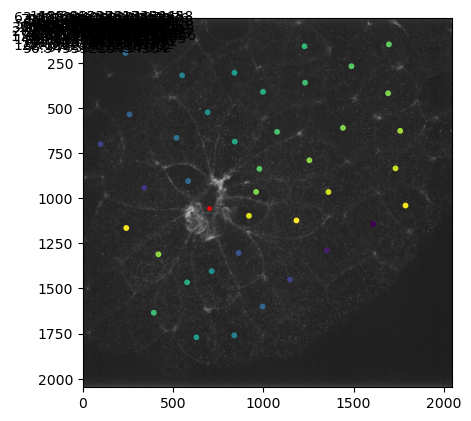

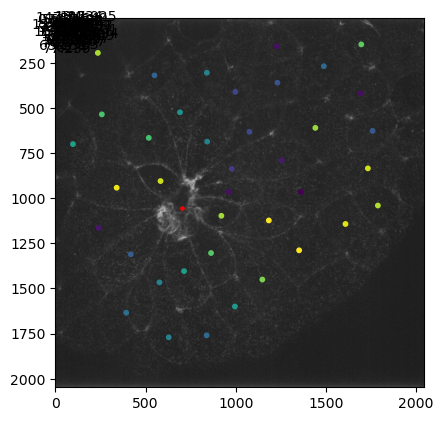

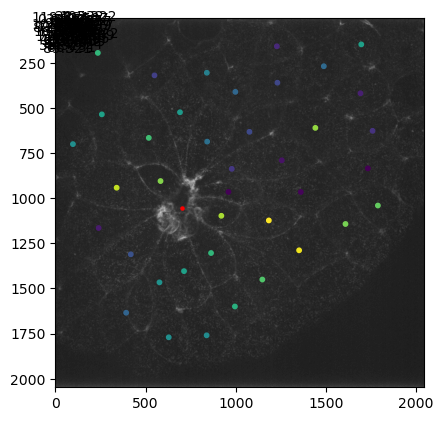

In [60]:
testdf["X'"]=testdf["X"]-76.22266666666665
testdf["Y'"]=testdf["Y"]-122.76288888888888
testdf["Theta"]=np.arctan2(testdf["Y'"],testdf["X'"])
testdf["anglePolar"]=[x+180 if x<0  else x for x in np.rad2deg(testdf["Theta"])]
testdf["Ferettrasnform"]=testdf["FeretAngle"]+270
testdf["R"]=np.sqrt(testdf["X'"]**2+testdf["Y'"]**2)
testdf["Aligtheta"]=testdf["anglePolar"]-testdf["FeretAngle"]
plotCenters(testdf,image,"anglePolar")
plotCenters(testdf,image,"FeretAngle")
plotCenters(angle_df,image,"Angle")

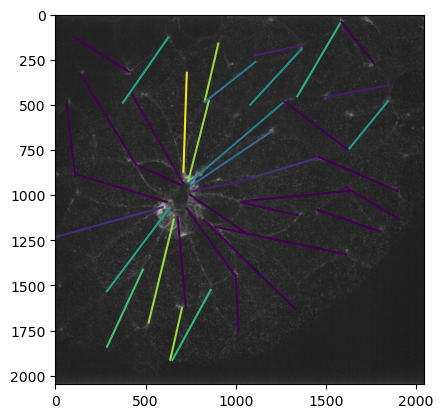

In [128]:
plotlines(testdf,image)        

In [66]:
# Define the number of bins
num_bins = 3
testdf['radius_bins'] = pd.qcut(testdf['R'], num_bins, labels=False)
# Group by the bins and calculate the average feretangle for each bin
average_feretangle = testdf.groupby('radius_bins')['FeretAngle'].mean().reset_index()
print(average_feretangle)

   radius_bins  FeretAngle
0            0   95.246923
1            1   77.550769
2            2   92.121769


In [67]:
testdf

,,Area,X,Y,XM,YM,Feret,FeretX,FeretY,FeretAngle,MinFeret,X',Y',Theta,anglePolar,Ferettrasnform,R,Aligtheta,radius_bins
4,5,790.103,10.545,75.612,10.587,75.650,44.698,63,486,96.540,24.045,-65.677667,-47.150889,-2.518945,35.675080,366.540,80.850246,-60.864920,1
35,36,807.407,25.458,21.030,25.498,21.035,39.334,99,121,147.710,30.910,-50.764667,-101.732889,-2.033643,63.480824,417.710,113.695348,-84.229176,2
8,9,1254.684,25.931,125.815,26.094,125.765,65.775,7,1230,15.570,38.288,-50.291667,3.052111,3.080979,176.527081,285.570,50.384195,160.957081,0
34,35,1188.276,27.844,57.806,27.890,57.923,63.754,136,326,121.665,36.134,-48.378667,-64.956889,-2.210949,53.321954,391.665,80.993165,-68.343046,1
10,11,1082.720,36.713,101.702,36.861,101.749,57.287,109,882,163.072,27.408,-39.509667,-21.060889,-2.651851,28.060141,433.072,44.772478,-135.011859,0
13,14,988.990,42.379,176.524,42.418,176.479,50.736,287,1839,65.131,30.001,-33.843667,53.761111,2.132639,122.191214,335.131,63.526773,57.060214,1
11,12,1022.670,45.175,141.565,45.417,141.339,62.430,286,1532,53.110,23.233,-31.047667,18.802111,2.597074,148.801383,323.110,36.297066,95.691383,0
1,2,1185.331,55.941,71.864,56.007,71.948,61.327,426,443,119.870,31.911,-20.281667,-50.898889,-1.949983,68.274215,389.870,54.790902,-51.595785,0
25,26,710.286,59.348,34.477,59.315,34.505,47.081,374,488,55.213,23.229,-16.874667,-88.285889,-1.759655,79.179191,325.213,89.884106,23.966191,2
38,39,493.087,62.334,158.343,62.346,158.174,63.440,517,1705,76.272,21.176,-13.888667,35.580111,1.942955,111.323146,346.272,38.194756,35.051146,0
